In [35]:
import sys
sys.path.append("/home/ajag/tcdona3")
import math
from tcdona2.polatis import Polatis
from monitor import RoadmMonitor
from ila import ILA
from bbsource import BBS
import time     
import json

In [36]:
pol = Polatis()
pol.login()

monitors = [RoadmMonitor('lumentum_4'), RoadmMonitor('lumentum_2'), RoadmMonitor('lumentum_7'), RoadmMonitor('lumentum_9'), RoadmMonitor('lumentum_8'), RoadmMonitor('lumentum_6'), RoadmMonitor('lumentum_5'), RoadmMonitor('lumentum_3')]
monitor4 = monitors[0]
monitor2 = monitors[1]
monitor7 = monitors[2]
monitor9 = monitors[3]
monitor8 = monitors[4]
monitor6 = monitors[5]
monitor5 = monitors[6]
monitor3 = monitors[7]

roadms = [monitor.roadm for monitor in monitors]
roadm4 = roadms[0]
roadm2 = roadms[1]
roadm7 = roadms[2]
roadm9 = roadms[3]
roadm8 = roadms[4]
roadm6 = roadms[5]
roadm5 = roadms[6]
roadm3 = roadms[7]


Initializing ROADM Monitoring for lumentum_4...
Initializing ROADM Monitoring for lumentum_2...
Initializing ROADM Monitoring for lumentum_7...
Initializing ROADM Monitoring for lumentum_9...


SSHError: Could not open socket to 10.10.10.17:830

In [15]:
test1_patch_list = [
('tf_1', 'roadm_4_p1'), 
('tf_2', 'roadm_4_p2'), 
('tf_3', 'roadm_4_p3'), 

('roadm_4_line', 'fiber_temp_100m'), 
('fiber_temp_100m', 'roadm_3_line'), 

('roadm_3_p1', 'fiber_7_510m') ,
('fiber_7_510m', 'roadm_7_line'),

('roadm_7_p1', 'roadm_7_p1'),

('roadm_7_line', 'fiber_19_12646m'),
('fiber_19_12646m', 'roadm_8_line'),

('roadm_8_p1', 'roadm_8_p1'),

('roadm_8_line', 'fiber_18_25220m'),
('fiber_18_25220m', 'roadm_9_line'),

('roadm_9_p1', 'roadm_9_p1'),

('roadm_9_line', 'fiber_22_25332m'),
('fiber_22_25332m', 'roadm_6_line'),

('roadm_6_p1', 'roadm_6_p1'),

('roadm_6_line', 'fiber_17_665m'),
('fiber_17_665m', 'fiber_p1b_394m'),
('fiber_p1b_394m', 'roadm_5_line'),

('roadm_5_p1', 'roadm_5_p1'),

('roadm_5_line', 'fiber_15_11895m'),
('fiber_15_11895m', 'roadm_2_p1'),

('roadm_2_line', 'fiber_temp_268m'), 
('fiber_temp_268m', 'roadm_4_line'), 

('roadm_4_p1', 'tf_1'),
('roadm_4_p2', 'tf_2'), 
('roadm_4_p3', 'tf_3'), 

# ('roadm_4_p4', 'PH-AROF-1'), ## need to add 2 # disabling this for now
]

In [29]:
pol.apply_patch_list(test1_patch_list)

tf_1 (1): -0.16 dBm ---> roadm_4_p1 (427): -1.79 dBm < 20.00 dBm
tf_2 (2): 2.96 dBm ---> roadm_4_p2 (448): -48.19 dBm < 20.00 dBm
tf_3 (3): 3.06 dBm ---> roadm_4_p3 (447): -48.00 dBm < 20.00 dBm
roadm_4_line (214): -0.42 dBm ---> fiber_temp_100m (401): -1.77 dBm < 20.00 dBm
fiber_temp_100m (81): -2.25 dBm ---> roadm_3_line (535): -3.66 dBm < 20.00 dBm
roadm_3_p1 (106): 3.20 dBm ---> fiber_7_510m (359): 1.82 dBm < 20.00 dBm
fiber_7_510m (39): 0.98 dBm ---> roadm_7_line (531): -0.64 dBm < 20.00 dBm
roadm_7_p1 (110): -1.77 dBm ---> roadm_7_p1 (430): -2.96 dBm < 20.00 dBm
roadm_7_line (211): -1.42 dBm ---> fiber_19_12646m (375): -2.75 dBm < 20.00 dBm
fiber_19_12646m (55): -5.99 dBm ---> roadm_8_line (530): -7.50 dBm < 20.00 dBm
roadm_8_p1 (111): -5.88 dBm ---> roadm_8_p1 (431): -7.30 dBm < 20.00 dBm
roadm_8_line (210): -5.54 dBm ---> fiber_18_25220m (374): -6.94 dBm < 20.00 dBm
fiber_18_25220m (54): -13.51 dBm ---> roadm_9_line (529): -14.99 dBm < 20.00 dBm
roadm_9_p1 (112): -12.82 dBm ---

In [30]:
### This block only needs to execte once for the experiment. Caution: Do not run this many times

# for roadm in roadms:
#     roadm.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')
#     roadm.edfa_config('preamp', target_gain=10.0, control_mode='constant-gain')

# time.sleep(30)

# for roadm in roadms:
#     roadm.make_grid('both', list(range(1,96)))

# for roadm in roadms:
#     roadm.disable_als(600)

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-24 18:25:47.397785


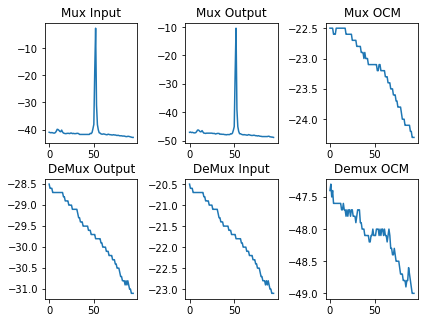

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-24 18:25:52.675198


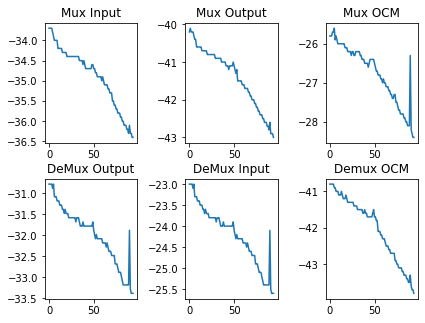

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-24 18:25:58.057001


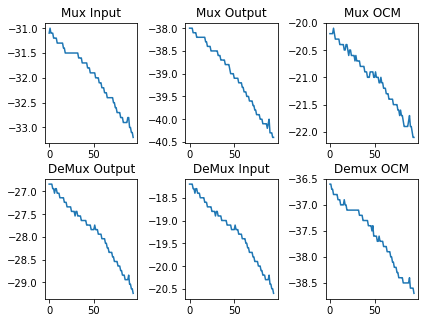

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-24 18:26:03.347437


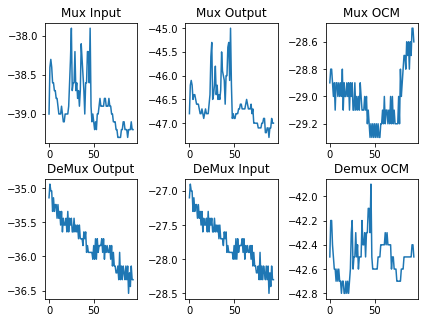

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-24 18:26:08.569705


KeyboardInterrupt: 

In [32]:
for monitor in monitors:
    monitor.plot_power('all', refresh=True, notebook=True)

In [34]:
roadm8.edfa_get_info()

KeyboardInterrupt: 